In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os 
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [9]:
def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

list_directory_tree_with_os_walk('.')

Directory: .
  File: .DS_Store
  File: submission_5.csv
  File: LSTM.ipynb
  File: submission_7.csv
  File: submission_6.csv
  File: new.ipynb
  File: X_obs.csv
  File: Submission_5.ipynb
  File: EDA_Marijan.ipynb
  File: EDA_train_estimated_a.html
  File: y_a.csv
  File: NN-test-Copy1.ipynb
  File: Solar Forecast.csv
  File: test_shift.ipynb
  File: NN-test.ipynb
  File: submission_9.csv
  File: X_est.csv
Directory: ./.ipynb_checkpoints
  File: NN-test-Copy1-checkpoint.ipynb
  File: new-checkpoint.ipynb
  File: test_shift-checkpoint.ipynb
  File: X_est-checkpoint.csv
  File: EDA_Marijan-checkpoint.ipynb
  File: Submission_5-checkpoint.ipynb
  File: NN-test-checkpoint.ipynb
  File: submission_6-checkpoint.csv
  File: submission_5-checkpoint.csv
  File: LSTM-checkpoint.ipynb


In [10]:
cd ../data

/Users/marijansoric/Documents/GitHub/Solar-Energy-Production-Forecasting/data


# Pre-processing : 

In [11]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
train_a = pd.read_parquet('A/train_targets.parquet')

X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')

X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

#Delete features because high correlation between them (>0.9) : 
X_train_estimated_a.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)
X_train_observed_a.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J'], axis = 1, inplace = True)
X_test_estimated_a.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)

X_train_estimated_b.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)
X_train_observed_b.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J'], axis = 1, inplace = True)
X_test_estimated_b.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)

X_train_estimated_c.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)
X_train_observed_c.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J'], axis = 1, inplace = True)
X_test_estimated_c.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)

#Delete because constant values:
X_train_estimated_a.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_train_observed_a.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_test_estimated_a.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)

X_train_estimated_b.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_train_observed_b.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_test_estimated_b.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)

X_train_estimated_c.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_train_observed_c.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_test_estimated_c.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)


In [12]:
#We match the sizes of X and Y 
#We keep the measurements from every hour only 
X_train_estimated_a = X_train_estimated_a.loc[X_train_estimated_a.index[::4]]
X_train_observed_a = X_train_observed_a.loc[X_train_observed_a.index[::4]]
X_test_estimated_a = X_test_estimated_a.loc[X_test_estimated_a.index[::4]]


X_train_estimated_b = X_train_estimated_b.loc[X_train_estimated_b.index[::4]]
X_train_observed_b = X_train_observed_b.loc[X_train_observed_b.index[::4]]
X_test_estimated_b = X_test_estimated_b.loc[X_test_estimated_b.index[::4]]

X_train_estimated_c = X_train_estimated_c.loc[X_train_estimated_c.index[::4]]
X_train_observed_c = X_train_observed_c.loc[X_train_observed_c.index[::4]]
X_test_estimated_c = X_test_estimated_c.loc[X_test_estimated_c.index[::4]]

#We put the dates as the indexes of the data, and we remove some dates that are not in the corresponding y data.
X_train_estimated_a.set_index('date_forecast', inplace = True)
X_train_observed_a.set_index('date_forecast', inplace = True)
X_test_estimated_a.set_index('date_forecast', inplace = True)

X_train_estimated_b.set_index('date_forecast', inplace = True)
X_train_observed_b.set_index('date_forecast', inplace = True)
X_test_estimated_b.set_index('date_forecast', inplace = True)

X_train_estimated_c.set_index('date_forecast', inplace = True)
X_train_observed_c.set_index('date_forecast', inplace = True)
X_test_estimated_c.set_index('date_forecast', inplace = True)

train_a.set_index('time', inplace = True)
train_b.set_index('time', inplace = True)
train_c.set_index('time', inplace = True)

train_a.dropna(inplace = True)
train_b.dropna(inplace = True)
train_c.dropna(inplace = True)

intersection_index_estimated_a = X_train_estimated_a.index.intersection(train_a.index)
intersection_index_estimated_b = X_train_estimated_b.index.intersection(train_b.index)
intersection_index_estimated_c = X_train_estimated_c.index.intersection(train_c.index)

intersection_index_observed_a = X_train_observed_a.index.intersection(train_a.index)
intersection_index_observed_b = X_train_observed_b.index.intersection(train_b.index)
intersection_index_observed_c = X_train_observed_c.index.intersection(train_c.index)

X_train_estimated_a_matched = X_train_estimated_a.loc[intersection_index_estimated_a]
train_a_estimated_matched = train_a.loc[intersection_index_estimated_a]
X_train_observed_a_matched = X_train_observed_a.loc[intersection_index_observed_a]
train_a_observed_matched = train_a.loc[intersection_index_observed_a]

X_train_estimated_b_matched = X_train_estimated_b.loc[intersection_index_estimated_b]
train_b_estimated_matched = train_b.loc[intersection_index_estimated_b]
X_train_observed_b_matched = X_train_observed_b.loc[intersection_index_observed_b]
train_b_observed_matched = train_b.loc[intersection_index_observed_b]

X_train_estimated_c_matched = X_train_estimated_c.loc[intersection_index_estimated_c]
train_c_estimated_matched = train_c.loc[intersection_index_estimated_c]
X_train_observed_c_matched = X_train_observed_c.loc[intersection_index_observed_c]
train_c_observed_matched = train_c.loc[intersection_index_observed_c]

X_test_estimated_a['2023-05-01 00:00:00' : '2023-05-30 00:00:00'].index

DatetimeIndex(['2023-05-01 00:00:00', '2023-05-01 01:00:00',
               '2023-05-01 02:00:00', '2023-05-01 03:00:00',
               '2023-05-01 04:00:00', '2023-05-01 05:00:00',
               '2023-05-01 06:00:00', '2023-05-01 07:00:00',
               '2023-05-01 08:00:00', '2023-05-01 09:00:00',
               ...
               '2023-05-28 15:00:00', '2023-05-28 16:00:00',
               '2023-05-28 17:00:00', '2023-05-28 18:00:00',
               '2023-05-28 19:00:00', '2023-05-28 20:00:00',
               '2023-05-28 21:00:00', '2023-05-28 22:00:00',
               '2023-05-28 23:00:00', '2023-05-30 00:00:00'],
              dtype='datetime64[us]', name='date_forecast', length=265, freq=None)

In [13]:
#One Hot encoding 
from sklearn.preprocessing import OneHotEncoder

idx = ['dew_or_rime:idx',\
       'is_day:idx', 
       'is_in_shadow:idx',
       'precip_type_5min:idx',]

for id in idx:
    concatenated_df = pd.concat([X_train_observed_a_matched[id], X_train_estimated_a_matched[id], X_test_estimated_a[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_a_matched.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_a_matched.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_a.index]
    X_train_observed_a_matched = pd.concat([X_train_observed_a_matched, df_observed_encoded], axis =1)
    X_train_estimated_a_matched = pd.concat([X_train_estimated_a_matched, df_estimated_encoded], axis = 1)
    X_test_estimated_a = pd.concat([X_test_estimated_a, df_test_encoded], axis = 1)
    X_train_observed_a_matched.drop([id], inplace = True, axis=1)
    X_train_estimated_a_matched.drop([id], inplace = True, axis=1)
    X_test_estimated_a.drop([id], inplace = True, axis=1)
    
for id in idx:
    concatenated_df = pd.concat([X_train_observed_b_matched[id], X_train_estimated_b_matched[id], X_test_estimated_b[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_b_matched.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_b_matched.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_b.index]
    X_train_observed_b_matched = pd.concat([X_train_observed_b_matched, df_observed_encoded], axis =1)
    X_train_estimated_b_matched = pd.concat([X_train_estimated_b_matched, df_estimated_encoded], axis = 1)
    X_test_estimated_b = pd.concat([X_test_estimated_b, df_test_encoded], axis = 1)
    X_train_observed_b_matched.drop([id], inplace = True, axis=1)
    X_train_estimated_b_matched.drop([id], inplace = True, axis=1)
    X_test_estimated_b.drop([id], inplace = True, axis=1)
    
for id in idx:
    concatenated_df = pd.concat([X_train_observed_c_matched[id], X_train_estimated_c_matched[id], X_test_estimated_c[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_c_matched.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_c_matched.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_c.index]
    X_train_observed_c_matched = pd.concat([X_train_observed_c_matched, df_observed_encoded], axis =1)
    X_train_estimated_c_matched = pd.concat([X_train_estimated_c_matched, df_estimated_encoded], axis = 1)
    X_test_estimated_c = pd.concat([X_test_estimated_c, df_test_encoded], axis = 1)
    X_train_observed_c_matched.drop([id], inplace = True, axis=1)
    X_train_estimated_c_matched.drop([id], inplace = True, axis=1)
    X_test_estimated_c.drop([id], inplace = True, axis=1)


In [14]:
#Missing values
X_train_estimated_a_final = X_train_estimated_a_matched.fillna(value={
                'ceiling_height_agl:m' : X_train_estimated_a_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_estimated_a_matched['cloud_base_agl:m'].mean()})

X_train_observed_a_final = X_train_observed_a_matched.fillna(value={
               'ceiling_height_agl:m' : X_train_observed_a_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_observed_a_matched['cloud_base_agl:m'].mean()})

X_test_estimated_a_final = X_test_estimated_a.fillna(value={
                'ceiling_height_agl:m' : X_test_estimated_a['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_test_estimated_a['cloud_base_agl:m'].mean()})


X_train_estimated_b_final = X_train_estimated_b_matched.fillna(value={
                'ceiling_height_agl:m' : X_train_estimated_b_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_estimated_b_matched['cloud_base_agl:m'].mean()})

X_train_observed_b_final = X_train_observed_b_matched.fillna(value={
               'ceiling_height_agl:m' : X_train_observed_b_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_observed_b_matched['cloud_base_agl:m'].mean()})

X_test_estimated_b_final = X_test_estimated_b.fillna(value={
                'ceiling_height_agl:m' : X_test_estimated_b['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_test_estimated_b['cloud_base_agl:m'].mean()})


X_train_estimated_c_final = X_train_estimated_c_matched.fillna(value={
                'ceiling_height_agl:m' : X_train_estimated_c_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_estimated_c_matched['cloud_base_agl:m'].mean()})

X_train_observed_c_final = X_train_observed_c_matched.fillna(value={
               'ceiling_height_agl:m' : X_train_observed_c_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_observed_c_matched['cloud_base_agl:m'].mean()})

X_test_estimated_c_final = X_test_estimated_c.fillna(value={
                'ceiling_height_agl:m' : X_test_estimated_c['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_test_estimated_c['cloud_base_agl:m'].mean()})


In [15]:
print(X_train_estimated_a_final.shape)
print(X_train_estimated_b_final.shape)
print(X_train_estimated_c_final.columns)
for column in X_train_estimated_c_final.columns : 
    if column not in X_train_estimated_b_final.columns : 
        print(column)

(4394, 44)
(3601, 44)
Index(['absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_rad:W', 'cloud_base_agl:m',
       'diffuse_rad:W', 'direct_rad:W', 'effective_cloud_cover:p',
       'elevation:m', 'fresh_snow_12h:cm', 'fresh_snow_1h:cm',
       'fresh_snow_24h:cm', 'fresh_snow_3h:cm', 'fresh_snow_6h:cm',
       'precip_5min:mm', 'pressure_100m:hPa', 'prob_rime:p', 'rain_water:kgm2',
       'relative_humidity_1000hPa:p', 'snow_depth:cm', 'snow_melt_10min:mm',
       'snow_water:kgm2', 'sun_azimuth:d', 'sun_elevation:d',
       'super_cooled_liquid_water:kgm2', 't_1000hPa:K', 'total_cloud_cover:p',
       'visibility:m', 'wind_speed_10m:ms', 'wind_speed_u_10m:ms',
       'wind_speed_v_10m:ms', 'dew_or_rime:idx_-1.0', 'dew_or_rime:idx_0.0',
       'dew_or_rime:idx_1.0', 'is_day:idx_0.0', 'is_day:idx_1.0',
       'is_in_shadow:idx_0.0', 'is_in_shadow:idx_1.0',
       'precip_type_5min:idx_0.0', 'precip_type_5min:idx_1.0',
       'precip_type_5min:i

In [16]:
X_train_estimated_a_final['direct_rad:W'].isna().sum()

0

In [17]:
#Normalisation 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()

list_df_final = []
for X in [X_train_estimated_a_final, X_train_observed_a_final, X_test_estimated_a_final,\
         X_train_estimated_b_final, X_train_observed_b_final, X_test_estimated_b_final,\
         X_train_estimated_c_final, X_train_observed_c_final, X_test_estimated_c_final] : 
    columns = X.columns 
    index = X.index 
    X = scaler.fit_transform(X)
    X = pd.DataFrame(X, columns = columns)
    X.set_index(index, inplace= True)
    list_df_final.append(X)

In [18]:
X_train_estimated_a_final = list_df_final[0]
X_train_observed_a_final = list_df_final[1]
X_test_estimated_a_final = list_df_final[2]

X_train_estimated_b_final = list_df_final[3]
X_train_observed_b_final = list_df_final[4]
X_test_estimated_b_final = list_df_final[5]

X_train_estimated_c_final = list_df_final[6]
X_train_observed_c_final = list_df_final[7]
X_test_estimated_c_final = list_df_final[8]

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_rad:W,cloud_base_agl:m,diffuse_rad:W,direct_rad:W,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,precip_5min:mm,pressure_100m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,snow_depth:cm,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,dew_or_rime:idx_-1.0,dew_or_rime:idx_0.0,dew_or_rime:idx_1.0,is_day:idx_0.0,is_day:idx_1.0,is_in_shadow:idx_0.0,is_in_shadow:idx_1.0,precip_type_5min:idx_0.0,precip_type_5min:idx_1.0,precip_type_5min:idx_2.0,precip_type_5min:idx_3.0,precip_type_5min:idx_5.0,precip_type_5min:idx_6.0
count,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.0,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.0,4394.0
mean,0.396485,0.430451,0.259343,0.092734,0.141037,0.077196,0.048673,0.683182,0.0,0.033606,0.010556,0.042032,0.015769,0.021903,0.011724,0.544670,0.005663,0.007909,0.651269,0.043413,0.004307,0.024053,0.496098,0.430884,0.036059,0.573438,0.737253,0.487272,0.296429,0.415229,0.514319,0.020255,0.949704,0.030041,0.652025,0.347975,0.304506,0.695494,0.955621,0.024579,0.007965,0.011834,0.0,0.0
std,0.193878,0.185723,0.175411,0.202978,0.147475,0.154351,0.149421,0.358845,0.0,0.108531,0.059171,0.110891,0.073114,0.086820,0.061471,0.203366,0.048592,0.057033,0.179075,0.150516,0.042457,0.061321,0.284768,0.238270,0.093897,0.177220,0.363183,0.251631,0.173035,0.176943,0.146642,0.140891,0.218586,0.170714,0.476381,0.476381,0.460244,0.460244,0.205957,0.154853,0.088902,0.108154,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.256410,0.308642,0.127954,0.000000,0.047296,0.000000,0.000000,0.421000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.398639,0.000000,0.000000,0.528662,0.000000,0.000000,0.000000,0.253359,0.236910,0.000000,0.461831,0.479250,0.281671,0.153846,0.289017,0.421488,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.371795,0.413581,0.259343,0.000000,0.101364,0.000000,0.000000,0.851000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.547278,0.000000,0.000000,0.677707,0.000000,0.000000,0.000000,0.508327,0.438483,0.000000,0.572519,0.980000,0.507360,0.269231,0.398844,0.520661,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.525641,0.549383,0.314297,0.052654,0.151457,0.078057,0.001846,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.687679,0.000000,0.000000,0.788535,0.000000,0.000000,0.031250,0.739006,0.597765,0.000000,0.690839,1.000000,0.700387,0.403846,0.502890,0.603306,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0

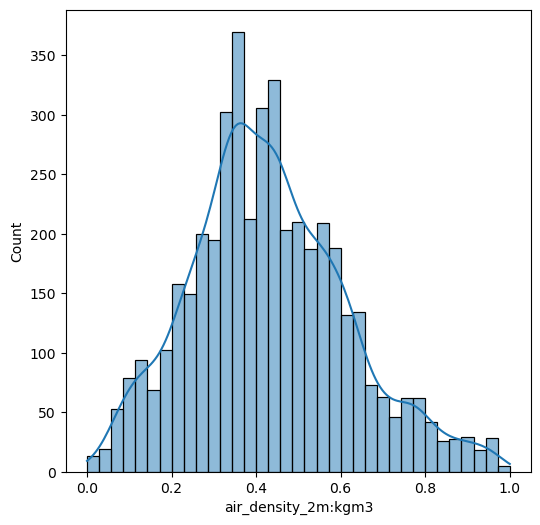

In [19]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

f = X_train_estimated_a_final['air_density_2m:kgm3']
sns.histplot(data=f, kde=True)

X_train_estimated_a_final.describe()

In [20]:
transformations = [['absolute_humidity_2m:gm3', 'f'],
 ['air_density_2m:kgm3', '1/f'],
 ['ceiling_height_agl:m', 'f'],
 ['clear_sky_rad:W', 'f'],
 ['cloud_base_agl:m', 'logfc'],
 ['dew_or_rime:idx', 'hot'],
 ['effective_cloud_cover:p', 'f^2'],
 ['elevation:m', 'constant'],
 ['fresh_snow_12h:cm', 'loglogf ou rien'],
 ['fresh_snow_1h:cm', 'loglogf ou rien'],
 ['fresh_snow_24h:cm', 'loglogf ou rien'],
 ['fresh_snow_3h:cm', 'loglogf ou rien'],
 ['fresh_snow_6h:cm', 'loglogf ou rien'],
 ['is_day:idx', 'hot'],
 ['is_in_shadow:idx', 'hot'],
 ['precip_5min:mm', 'loglogf ou rien'],
 ['precip_type_5min:idx', 'hot'],
 ['pressure_100m:hPa', 'rien'],
 ['prob_rime:p', 'loglogf ou rien'],
 ['rain_water:kgm2', 'one hot à faire !'],
 ['relative_humidity_1000hPa:p', ''],
 ['snow_density:kgm3', 'constant'],
 ['snow_depth:cm', 'loglogf ou rien'],
 ['snow_drift:idx', 'hot'],
 ['snow_melt_10min:mm', 'loglogf ou rien'],
 ['snow_water:kgm2', 'loglogf ou rien'],
 ['sun_azimuth:d', 'f ou f^2'],
 ['sun_elevation:d', 'f ou f^2'],
 ['super_cooled_liquid_water:kgm2', 'loglogf ou rien'],
 ['t_1000hPa:K', 'f^2'],
 ['total_cloud_cover:p', 'f^2 ou rien'],
 ['visibility:m', 'f'],
 ['wind_speed_10m:ms', 'f ou logfc'],
 ['wind_speed_u_10m:ms', 'f ou logfc'],
 ['wind_speed_v_10m:ms', 'f'],
 ['wind_speed_w_1000hPa:ms', 'hot']]

In [21]:
for X in [X_train_estimated_a_final, X_train_observed_a_final, X_test_estimated_a_final,\
         X_train_estimated_b_final, X_train_observed_b_final, X_test_estimated_b_final,\
         X_train_estimated_c_final, X_train_observed_c_final, X_test_estimated_c_final] : 
    for feature, function in transformations:
        if function == '1/f':
            X[feature] = 1/(X[feature]+.5)
        if function == 'logfc':
            X[feature] = np.log(X[feature] + (X[feature].quantile(.25)/X[feature].quantile(.75))**2 )
        if function == 'f^2':
            X[feature] = (X[feature])**2
        if function == 'logf':
            X[feature] = np.log(X[feature]+.001)
        if function == 'loglogf':
            X[feature] = np.log(np.log(X[feature]+1)+1)

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_rad:W,cloud_base_agl:m,diffuse_rad:W,direct_rad:W,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,precip_5min:mm,pressure_100m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,snow_depth:cm,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,dew_or_rime:idx_-1.0,dew_or_rime:idx_0.0,dew_or_rime:idx_1.0,is_day:idx_0.0,is_day:idx_1.0,is_in_shadow:idx_0.0,is_in_shadow:idx_1.0,precip_type_5min:idx_0.0,precip_type_5min:idx_1.0,precip_type_5min:idx_2.0,precip_type_5min:idx_3.0,precip_type_5min:idx_5.0,precip_type_5min:idx_6.0
count,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.0,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.0,4394.0
mean,0.396485,1.119031,0.259343,0.092734,-1.568455,0.077196,0.048673,0.595478,0.0,0.033606,0.010556,0.042032,0.015769,0.021903,0.011724,0.544670,0.005663,0.007909,0.651269,0.043413,0.004307,0.024053,0.496098,0.430884,0.036059,0.360231,0.737253,0.487272,0.296429,0.415229,0.514319,0.020255,0.949704,0.030041,0.652025,0.347975,0.304506,0.695494,0.955621,0.024579,0.007965,0.011834,0.0,0.0
std,0.193878,0.230443,0.175411,0.202978,0.488740,0.154351,0.149421,0.401537,0.0,0.108531,0.059171,0.110891,0.073114,0.086820,0.061471,0.203366,0.048592,0.057033,0.179075,0.150516,0.042457,0.061321,0.284768,0.238270,0.093897,0.201043,0.363183,0.251631,0.173035,0.176943,0.146642,0.140891,0.218586,0.170714,0.476381,0.476381,0.460244,0.460244,0.205957,0.154853,0.088902,0.108154,0.0,0.0
min,0.000000,0.666666,0.000000,0.000000,-2.327771,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.256410,0.952941,0.127954,0.000000,-1.932344,0.000000,0.000000,0.177241,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.398639,0.000000,0.000000,0.528662,0.000000,0.000000,0.000000,0.253359,0.236910,0.000000,0.213288,0.479250,0.281671,0.153846,0.289017,0.421488,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.371795,1.094594,0.259343,0.000000,-1.615070,0.000000,0.000000,0.724201,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.547278,0.000000,0.000000,0.677707,0.000000,0.000000,0.000000,0.508327,0.438483,0.000000,0.327778,0.980000,0.507360,0.269231,0.398844,0.520661,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.525641,1.236641,0.314297,0.052654,-1.390424,0.078057,0.001846,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.687679,0.000000,0.000000,0.788535,0.000000,0.000000,0.031250,0.739006,0.597765,0.000000,0.477258,1.000000,0.700387,0.403846,0.502890,0.603306,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,2.000000,1.000000,1.000000,0.093047,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000

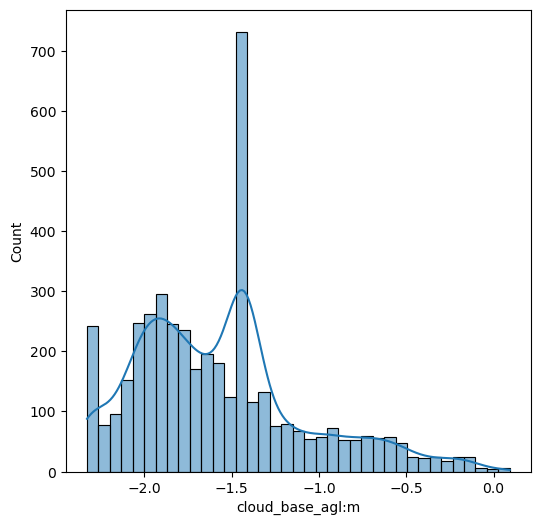

In [22]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

f = X_train_estimated_a_final['cloud_base_agl:m']
sns.histplot(data=f, kde=True)

X_train_estimated_a_final.describe()

In [23]:
#Normalisation 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_train_estimated_a_scaled = scaler.fit_transform(X_train_estimated_a_final)
X_train_observed_a_scaled = scaler.fit_transform(X_train_observed_a_final)
X_test_estimated_a_scaled = scaler.fit_transform(X_test_estimated_a_final)

X_train_estimated_b_scaled = scaler.fit_transform(X_train_estimated_b_final)
X_train_observed_b_scaled = scaler.fit_transform(X_train_observed_b_final)
X_test_estimated_b_scaled = scaler.fit_transform(X_test_estimated_b_final)

X_train_estimated_c_scaled = scaler.fit_transform(X_train_estimated_c_final)
X_train_observed_c_scaled = scaler.fit_transform(X_train_observed_c_final)
X_test_estimated_c_scaled = scaler.fit_transform(X_test_estimated_c_final)

<Axes: xlabel='cloud_base_agl:m', ylabel='Count'>

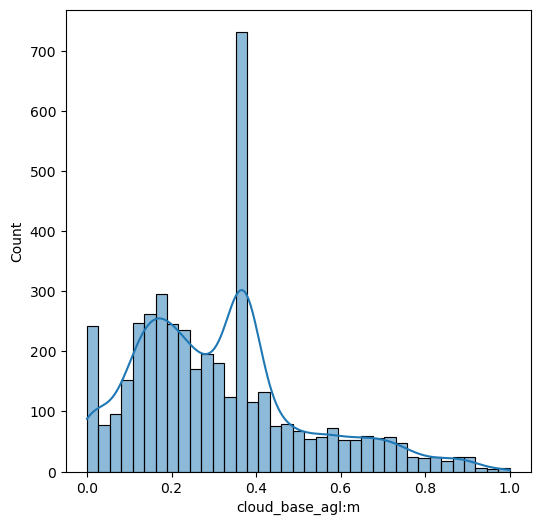

In [24]:
X = pd.DataFrame(X_train_estimated_a_scaled, columns = X_train_estimated_a_final.columns)
X.set_index(X_train_estimated_a_final.index, inplace= True)
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

f = X['cloud_base_agl:m']
sns.histplot(data=f, kde=True)

In [25]:
X_train_total_a = np.concatenate((X_train_observed_a_scaled, X_train_estimated_a_scaled), axis = 0)
X_train_total_b = np.concatenate((X_train_observed_b_scaled, X_train_estimated_b_scaled), axis = 0)
X_train_total_c = np.concatenate((X_train_observed_c_scaled, X_train_estimated_c_scaled), axis = 0)

In [44]:
pd.DataFrame(X_train_total_a).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
count,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.0,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000
mean,0.359760,0.376530,0.232726,0.185687,0.320261,0.126427,0.078273,0.577018,0.0,0.007438,0.002433,0.011629,0.003526,0.004420,0.005568,0.639727,0.002713,0.008517,0.664661,0.012904,0.001006,0.014670,0.505377,0.504690,0.041449,0.275725,0.742347,0.457917,0.212612,0.413348,0.543930,0.008808,0.961275,0.029917,0.500631,0.499369,0.462729,0.537271,0.934588,0.051261,0.005578,0.008514,0.000029,0.000029
std,0.170909,0.138363,0.182307,0.285591,0.195843,0.188483,0.171546,0.391280,0.0,0.050502,0.029159,0.062267,0.034457,0.037444,0.034259,0.142632,0.033494,0.038237,0.180452,0.082136,0.021164,0.041474,0.287827,0.243110,0.082263,0.161706,0.344679,0.255915,0.130432,0.150849,0.111039,0.093436,0.192953,0.170381,0.500008,0.500008,0.498651,0.498651,0.247252,0.220557,0.074477,0.091881,0.005418,0.005418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.226190,0.280443,0.102328,0.000000,0.171517,0.000000,0.000000,0.184041,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.560852,0.000000,0.000000,0.544631,0.000000,0.000000,0.000000,0.252393,0.334829,0.000000,0.151819,0.531000,0.217348,0.111842,0.302564,0.474860,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.339286,0.366803,0.228207,0.000000,0.303452,0.000000,0.000000,0.660969,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.656187,0.000000,0.000000,0.695990,0.000000,0.000000,0.000000,0.498672,0.505775,0.000000,0.252258,0.952000,0.513061,0.184211,0.394872,0.545455,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.476190,0.457013,0.259343,0.302707,0.403347,0.214137,0.051001,0.988036,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.738337,0.000000,0.000000,0.809832,0.000000,0.000000,0.014493,0.755586,0.676381,0.071429,0.364338,1.000000,0.678570,0.282895,0.512821,0.611570,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# RNN : LSTM

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim

In [27]:
X = torch.tensor(X_train_observed_a_scaled, dtype=torch.float32)
y = torch.tensor(train_a_observed_matched.to_numpy(), dtype=torch.float32).reshape(-1, 1)

In [28]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

In [30]:
num_epochs = 50 #1000 epochs
learning_rate = 0.001 #0.001 lr

input_size = X.shape[1] #number of features
hidden_size = 2 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 

In [37]:
model_a = LSTM1(num_classes, input_size, hidden_size, num_layers, seq_length=10)

In [39]:
criterion = torch.nn.L1Loss()    # mean-squared error for regression
optimizer = torch.optim.Adam(model_a.parameters(), lr=learning_rate) 

In [41]:
from torch.autograd import Variable 
X = Variable(torch.Tensor(X))
y = Variable(torch.Tensor(y))

In [42]:
for epoch in range(num_epochs):
    outputs = model_a.forward(X) #forward pass
    optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
    loss = criterion(outputs, y)
 
    loss.backward() #calculates the loss of the loss function
 
    optimizer.step() #improve from loss, i.e backprop
    if epoch % 5 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

RuntimeError: For unbatched 2-D input, hx and cx should also be 2-D but got (3-D, 3-D) tensors

# Prédiction sans LR pour la location A

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
models = [('GBM', GradientBoostingRegressor())]
from sklearn.metrics import mean_absolute_error as mae
for name, regressor in models:
    regressor.fit(X_train_total_a, pd.concat([train_a_observed_matched, train_a_estimated_matched], axis = 0).to_numpy().ravel())
    y_pred = regressor.predict(X_test_estimated_a_scaled)
    df_pred_a = pd.DataFrame({'prediction' : y_pred})
    df_pred_a.set_index(X_test_estimated_a_final.index, inplace = True)


NameError: name 'X_train_total_a' is not defined

In [ ]:
feature_importance = regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train_total_a[sorted_idx]))
plt.title("Feature Importance (MDI)")

fig.tight_layout()
plt.show()

In [ ]:
feature_importance[sorted_idx]

In [ ]:
np.argsort(feature_importance)[0:20]

In [ ]:
X_train_estimated_a_final.iloc[:,[43, 31, 35, 36, 42, 20, 19, 32, 37, 13, 12, 16, 10, 40,  8, 41, 33,
        9, 34, 24]].columns

In [ ]:
df_pred_a.plot(marker = '+'), train_a['2020-05-01 07:00:00' : '2020-07-01 07:00:00'].plot()
plt.figure()
df_pred_a['2023-05-01 07:00:00' : '2023-06-03 00:00:00'].plot(marker = '+')
train_a['2020-05-03 00:00:00' : '2020-06-03 00:00:00'].plot()

In [ ]:
for date in df_pred_a.index : 
    if df_pred_a.loc[date]['prediction'] < 0 :
        df_pred_a.loc[date]['prediction'] = 0

In [ ]:
# Transform the dataFrame of the prediction, to obtain the right file to submit
df_pred_a['location'] = ['A' for i in df_pred_a.index]
df_pred_a.reset_index(inplace = True)
df_pred_a.reset_index(inplace = True)
df_pred_a.columns = ['id', 'time', 'prediction', 'location']
df_pred_a

# Prédictions pour la location B

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
models = [('GBM', GradientBoostingRegressor())]
from sklearn.metrics import mean_absolute_error as mae
for name, regressor in models:
    regressor.fit(X_train_total_b, pd.concat([train_b_observed_matched, train_b_estimated_matched], axis = 0).to_numpy().ravel())
    y_pred = regressor.predict(X_test_estimated_b_scaled)
    df_pred_b = pd.DataFrame({'prediction' : y_pred})
    df_pred_b.set_index(X_test_estimated_b_final.index, inplace = True)

In [ ]:
feature_importance = regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train_total_b[sorted_idx]))
plt.title("Feature Importance (MDI)")

fig.tight_layout()
plt.show()

In [ ]:
feature_importance[sorted_idx]

In [ ]:
np.argsort(feature_importance)[0:20]

In [ ]:
X_train_estimated_b_final.iloc[:,[43, 31, 42, 20, 19, 32, 17, 16, 33, 34, 13, 12, 10,  9,  8, 35, 36,
       37, 40, 41]].columns.to_list()

In [ ]:
df_pred_b.plot(marker = '+'), train_b['2020-05-01 07:00:00' : '2020-07-01 07:00:00'].plot()
plt.figure()
df_pred_b['2023-05-01 07:00:00' : '2023-06-03 00:00:00'].plot(marker = '+')
train_b['2020-05-03 00:00:00' : '2020-06-03 00:00:00'].plot()

In [ ]:
for date in df_pred_b.index : 
    if df_pred_b.loc[date]['prediction'] < 0 :
        df_pred_b.loc[date]['prediction'] = 0

In [ ]:
# Transform the dataFrame of the prediction, to obtain the right file to submit
df_pred_b['location'] = ['B' for i in df_pred_b.index]
df_pred_b.reset_index(inplace = True)
df_pred_b.reset_index(inplace = True)
df_pred_b.columns = ['id', 'time', 'prediction', 'location']
df_pred_b

# Prédictions pour la location C


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
models = [('GBM', GradientBoostingRegressor())]
from sklearn.metrics import mean_absolute_error as mae
for name, regressor in models:
    regressor.fit(X_train_total_c, pd.concat([train_c_observed_matched, train_c_estimated_matched], axis = 0).to_numpy().ravel())
    y_pred = regressor.predict(X_test_estimated_c_scaled)
    df_pred_c = pd.DataFrame({'prediction' : y_pred})
    df_pred_c.set_index(X_test_estimated_c_final.index, inplace = True)

In [ ]:
df_pred_c.plot(marker = '+'), train_c['2020-05-01 07:00:00' : '2020-07-01 07:00:00'].plot()
plt.figure()
df_pred_c['2023-05-01 07:00:00' : '2023-06-03 00:00:00'].plot(marker = '+')
train_c['2020-05-03 00:00:00' : '2020-06-03 00:00:00'].plot()


In [ ]:
for date in df_pred_c.index : 
    if df_pred_c.loc[date]['prediction'] < 0 :
        df_pred_c.loc[date]['prediction'] = 0

In [ ]:
# Transform the dataFrame of the prediction, to obtain the right file to submit
df_pred_c['location'] = ['C' for i in df_pred_c.index]
df_pred_c.reset_index(inplace = True)
df_pred_c.reset_index(inplace = True)
df_pred_c.columns = ['id', 'time', 'prediction', 'location']
df_pred_c

In [ ]:
feature_importance = regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train_total_c[sorted_idx]))
plt.title("Feature Importance (MDI)")

fig.tight_layout()
plt.show()

In [ ]:
feature_importance

In [ ]:
feature_importance[sorted_idx]

In [ ]:
X_train_observed_c_final['precip_type_5min:idx_0.0'].sum()

In [ ]:
np.argsort(feature_importance)[0:17]

In [ ]:
X_train_estimated_c_final.iloc[:,[44, 35, 13, 12, 43, 10, 37, 39,  8, 40, 41, 32, 42, 33, 34, 31, 16]].columns.to_list()

# Gather all the predictions

In [ ]:
df_pred_total = pd.concat([df_pred_a, df_pred_b, df_pred_c], axis = 0)
df_pred_final = pd.DataFrame({'id' : [i for i in range(2160)], 'prediction' : df_pred_total['prediction'].to_numpy()})
df_pred_total
#df_pred_final[0:100]

In [ ]:
df_pred_final.to_csv('submission_3.csv', index=False)

In [ ]:
train_a[0:150]